In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
# Load the pre-trained MobileNetV2 model, excluding the top classification layer
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# Freeze the base model
base_model.trainable = False 

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
# Create new model on top
inputs = Input(shape=(96, 96, 3))
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

## II. Downloading and Processing the Data

In [5]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# Resize images from 32x32 to 96x96 to fit MobileNetV2 input size requirements
train_images_resized = tf.image.resize(train_images, (96, 96))
test_images_resized = tf.image.resize(test_images, (96, 96))

## Compiling and Training the Model

In [5]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history=model.fit(
 train_images_resized, train_labels,
 epochs=5,
 batch_size = 128,
 validation_split=0.3,
)
# Evaluate the model
model.evaluate(test_images_resized, test_labels)

Epoch 1/5
274/274 [==============================] - 475s 2s/step - loss: 0.9104 - accuracy: 0.6858 - val_loss: 0.6910 - val_accuracy: 0.7630
Epoch 2/5
274/274 [==============================] - 440s 2s/step - loss: 0.6294 - accuracy: 0.7817 - val_loss: 0.6290 - val_accuracy: 0.7830
Epoch 3/5
274/274 [==============================] - 428s 2s/step - loss: 0.5735 - accuracy: 0.7999 - val_loss: 0.6230 - val_accuracy: 0.7834
Epoch 4/5
274/274 [==============================] - 466s 2s/step - loss: 0.5413 - accuracy: 0.8110 - val_loss: 0.5949 - val_accuracy: 0.7923
Epoch 5/5
313/313 [==============================] - 99s 316ms/step - loss: 0.5815 - accuracy: 0.7992


[0.5814814567565918, 0.7991999983787537]

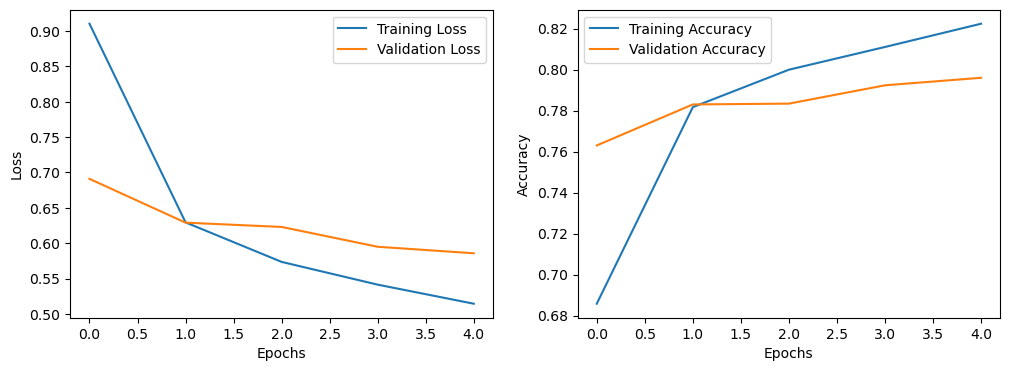

313/313 [==============================] - 70s 224ms/step - loss: 0.5815 - accuracy: 0.7992
Test Accuracy: 79.92%


In [6]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

In [9]:
from itertools import product
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
import tensorflow as tf

# Define a grid of hyperparameters
learning_rates = [0.002, 0.02, 0.2]
batch_sizes = [16, 64, 128]
param_grid = list(product(learning_rates, batch_sizes))

# Save grid search results for analysis
grid_search_results = []

# Perform grid search
for lr, batch_size in param_grid:
    print(f"Training with Learning Rate: {lr}, Batch Size: {batch_size}")  # Print the current hyperparameters

    # Create the model
    base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=(96, 96, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)
    model = tf.keras.models.Model(inputs, outputs)

    # Compile the model with current hyperparameters
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history_grid = model.fit(
        train_images_resized, train_labels,
        epochs=5,
        batch_size=batch_size,
        validation_split=0.3,
        callbacks=[tf.keras.callbacks.TensorBoard(log_dir=f'logs/grid_search/lr_{lr}_batch_{batch_size}', histogram_freq=1)]
    )

    # Save results for analysis
    grid_search_results.append({'Learning Rate': lr, 'Batch Size': batch_size, 'History': history_grid.history})


Training with Learning Rate: 0.002, Batch Size: 16
Epoch 1/5
2188/2188 [==============================] - 548s 248ms/step - loss: 0.8029 - accuracy: 0.7357 - val_loss: 0.8393 - val_accuracy: 0.7291
Epoch 2/5
2188/2188 [==============================] - 511s 234ms/step - loss: 0.6595 - accuracy: 0.7839 - val_loss: 0.7629 - val_accuracy: 0.7622
Epoch 3/5
2188/2188 [==============================] - 501s 229ms/step - loss: 0.6171 - accuracy: 0.7999 - val_loss: 0.7829 - val_accuracy: 0.7630
Epoch 4/5
2188/2188 [==============================] - 511s 234ms/step - loss: 0.5960 - accuracy: 0.8070 - val_loss: 0.8191 - val_accuracy: 0.7561
Epoch 5/5
2188/2188 [==============================] - 509s 232ms/step - loss: 0.5811 - accuracy: 0.8121 - val_loss: 0.7938 - val_accuracy: 0.7725
Training with Learning Rate: 0.002, Batch Size: 64
Epoch 1/5
547/547 [==============================] - 471s 851ms/step - loss: 0.7677 - accuracy: 0.7367 - val_loss: 0.7000 - val_accuracy: 0.7636
Epoch 2/5
547/547 

In [10]:
# After the grid search optimization loop
for result in grid_search_results:
    print("Hyperparameters - Learning Rate:", result['Learning Rate'], "- Batch Size:", result['Batch Size'])
    print("History:", result['History'])  
    print("\n")


Hyperparameters - Learning Rate: 0.002 - Batch Size: 16
History: {'loss': [0.8028901815414429, 0.6594890356063843, 0.6171306371688843, 0.5960062742233276, 0.581084132194519], 'accuracy': [0.7357428669929504, 0.7839428782463074, 0.7998856902122498, 0.8069714307785034, 0.8120571374893188], 'val_loss': [0.839297354221344, 0.7628687024116516, 0.7829126715660095, 0.8191068768501282, 0.7937914729118347], 'val_accuracy': [0.7291333079338074, 0.7621999979019165, 0.7630000114440918, 0.7561333179473877, 0.7724666595458984]}


Hyperparameters - Learning Rate: 0.002 - Batch Size: 64
History: {'loss': [0.767717182636261, 0.5900381207466125, 0.5410626530647278, 0.5161336064338684, 0.5039963126182556], 'accuracy': [0.7366571426391602, 0.7929714322090149, 0.8133428692817688, 0.8203714489936829, 0.8228285908699036], 'val_loss': [0.6999822854995728, 0.5950653553009033, 0.624558687210083, 0.6237476468086243, 0.624000608921051], 'val_accuracy': [0.7635999917984009, 0.7975999712944031, 0.788266658782959, 0

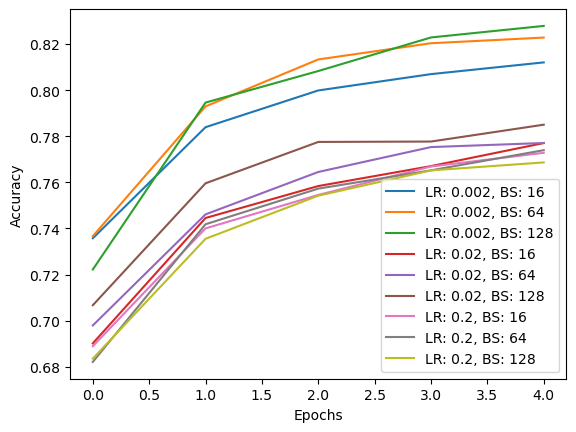

In [11]:
import matplotlib.pyplot as plt

for result in grid_search_results:
    plt.plot(result['History']['accuracy'], label=f"LR: {result['Learning Rate']}, BS: {result['Batch Size']}")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import random
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define a function to create a fresh model
def create_model(lr, batch_size, optimizer_choice):
    base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    inputs = Input(shape=(96, 96, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)

    if optimizer_choice == 'Adam':
        optimizer = Adam(learning_rate=lr)
    elif optimizer_choice == 'SGD':
        optimizer = SGD(learning_rate=lr)
    else:
        optimizer = RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Randomly select combinations of hyperparameters
num_random_samples = 5  
random_search_results = []

for _ in range(num_random_samples):
    lr = random.choice([0.002, 0.02, 0.2])
    batch_size = random.choice([16, 64, 128])
    optimizer_choice = random.choice(['Adam', 'SGD', 'RMSprop'])

    model = create_model(lr, batch_size, optimizer_choice)

    history_random = model.fit(
        train_images_resized, train_labels,
        epochs=5,
        batch_size=batch_size,
        validation_split=0.3,
        callbacks=[tf.keras.callbacks.TensorBoard(log_dir=f'logs/random_search_lr_{lr}_batch_{batch_size}_optimizer_{optimizer_choice}', histogram_freq=1)]
    )

    random_search_results.append({
        'Learning Rate': lr,
        'Batch Size': batch_size,
        'Optimizer': optimizer_choice,
        'History': history_random.history
    })


Epoch 1/5
547/547 [==============================] - 816s 1s/step - loss: 4.7130 - accuracy: 0.6447 - val_loss: 1.9005 - val_accuracy: 0.7442
Epoch 2/5
547/547 [==============================] - 668s 1s/step - loss: 2.7957 - accuracy: 0.7135 - val_loss: 1.8149 - val_accuracy: 0.7603
Epoch 3/5
547/547 [==============================] - 916s 2s/step - loss: 2.6469 - accuracy: 0.7261 - val_loss: 2.9091 - val_accuracy: 0.6850
Epoch 4/5
547/547 [==============================] - 1766s 3s/step - loss: 2.4472 - accuracy: 0.7378 - val_loss: 5.2746 - val_accuracy: 0.6031
Epoch 5/5
547/547 [==============================] - 23778s 44s/step - loss: 2.3140 - accuracy: 0.7477 - val_loss: 6.0560 - val_accuracy: 0.6476
Epoch 1/5
1265/2188 [================>.............] - ETA: 3:10 - loss: 0.8318 - accuracy: 0.7230

In [ ]:
# After the optimization loop
for result in random_search_results:
    print("Hyperparameters:", result['Learning Rate'], result['Batch Size'], result['Optimizer'])
    print("History:", result['History'])
    print("\n")


In [ ]:
import matplotlib.pyplot as plt

for result in random_search_results:
    plt.plot(result['History']['accuracy'], label=f"LR: {result['Learning Rate']}, BS: {result['Batch Size']}, Opt: {result['Optimizer']}")

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
